Above all, we need graphviz package. You can also refer to graphviz [documentation](https://graphviz.readthedocs.io/en/stable/manual.html)

```bash
pip install -U graphviz
```

In [1]:
import torch
from torch import nn

In [2]:
from yolort.models import yolov5s
from yolort.relaying import get_trace_module

In [3]:
model = yolov5s(pretrained=True)
tracing_module = get_trace_module(model)

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:593: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  'incorrect results).', category=RuntimeWarning)
/data/wangzq/yolov5-rt-stack/yolort/models/anchor_utils.py:31: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  stride = torch.as_tensor([stride], dtype=dtype, device=device)
/data/wangzq/yolov5-rt-stack/yolort/models/anchor_utils.py:50: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of co

In [4]:
print(tracing_module.code)

def forward(self,
    images: Tensor) -> Tuple[Tensor, Tensor, Tensor]:
  _0, _1, _2, = (self.model).forward(images, )
  return (_0, _1, _2)



In [5]:
from yolort.relaying.ir_visualizer import TorchScriptVisualizer

In [6]:
visualizer = TorchScriptVisualizer(tracing_module.model)

In [7]:
dot1 = visualizer.render(classes_to_visit={'YOLO', 'YOLOHead'})

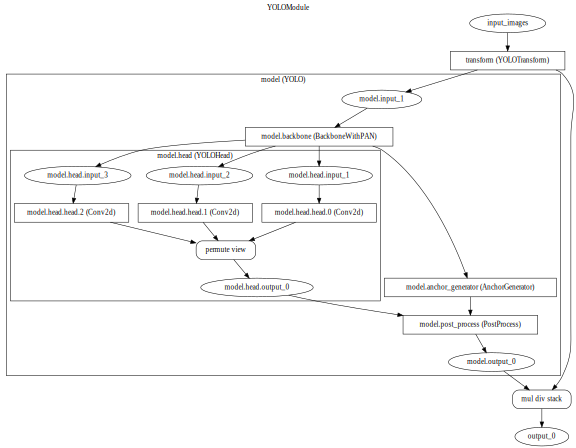

In [8]:
dot1

In [9]:
dot2 = visualizer.render(classes_to_visit={'YOLO', 'PostProcess'})

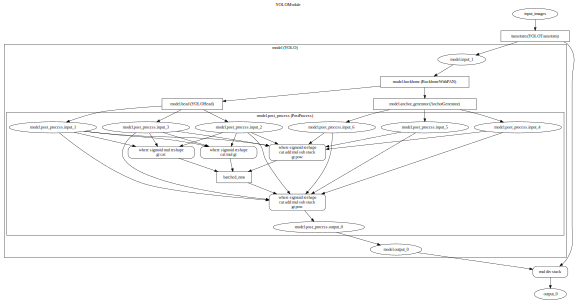

In [10]:
dot2